Корпус взят отсюда
https://drive.google.com/drive/u/1/folders/0B65_GJ8xcCTzR01EZnNlQXdvTms

Сам пример отсюда https://github.com/spro/practical-pytorch/blob/master/char-rnn-generation/char-rnn-generation.ipynb

In [21]:
import unidecode
import string
import random
import re

file = open('data/tolstoy.txt').read()
file_len = len(file)
print('file_len =', file_len)

file_len = 8680217


In [87]:
file[:100]

'\n\nПолное собрание сочинений. Том 2\n\n\n\n\n\n\n\nЛев НиколаевичТолстойПолное собрание сочинений. Том 2Отроч'

In [28]:
all_characters = ''.join(set(file))
n_characters = len(all_characters)

In [103]:
n_characters

222

In [29]:
all_characters

'wУ»СdБèûâіỳ„ïЛХ]É5̀r.î‹хpцçѣЯWöΘзÎНэЙи<ßiÇëęe\xa0нÀуҌo=ЦκОГІC6̀9РТGHдżъόäb>MЫ\nЬ¼xtеàщQ{Ѣ_с2kЧоЕлTмYNњ́Ѵ№Ò–0KМ―ќȃuб—s;йUPЁ! ыaD3qПáёh|Ю/RЖтрЗAФòzygАя%Вù+жфJmК-X«(Ъга",⅜vIóЭвЊч8?7f›шVôИ’½:@Щӧ\'°nFѳШjДéEҍ“Z)SO[юL41Bœc…×Ѳ*êćüьпśl'

In [30]:
chunk_len = 200

def random_chunk():
    start_index = random.randint(0, file_len - chunk_len)
    end_index = start_index + chunk_len + 1
    return file[start_index:end_index]

print(random_chunk())

удто обнимая что-то. Мать вернулась в хату и, узнав, о чем говорила немая, улыбнулась и покачала головой. Немая показала ей пряники и снова прогудела от радости.
— Я Улите говорила намедни, что сватать


In [31]:
import torch
import torch.nn as nn
from torch.autograd import Variable

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, n_layers=1):
        super(RNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = n_layers
        
        self.encoder = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, n_layers)
        self.decoder = nn.Linear(hidden_size, output_size)
    
    def forward(self, input, hidden):
        input = self.encoder(input.view(1, -1))
        output, hidden = self.gru(input.view(1, 1, -1), hidden)
        output = self.decoder(output.view(1, -1))
        return output, hidden

    def init_hidden(self):
        return Variable(torch.zeros(self.n_layers, 1, self.hidden_size))

In [32]:
# Turn string into list of longs
def char_tensor(string):
    tensor = torch.zeros(len(string)).long()
    for c in range(len(string)):
        tensor[c] = all_characters.index(string[c])
    return Variable(tensor)

print(char_tensor('сами'))

Variable containing:
  86
 161
  94
  37
[torch.LongTensor of size 4]



In [33]:
def random_training_set():    
    chunk = random_chunk()
    inp = char_tensor(chunk[:-1])
    target = char_tensor(chunk[1:])
    return inp, target

In [34]:
def evaluate(prime_str='A', predict_len=100, temperature=0.8):
    hidden = decoder.init_hidden()
    prime_input = char_tensor(prime_str)
    predicted = prime_str

    # Use priming string to "build up" hidden state
    for p in range(len(prime_str) - 1):
        _, hidden = decoder(prime_input[p], hidden)
    inp = prime_input[-1]
    
    for p in range(predict_len):
        output, hidden = decoder(inp, hidden)
        
        # Sample from the network as a multinomial distribution
        output_dist = output.data.view(-1).div(temperature).exp()
        top_i = torch.multinomial(output_dist, 1)[0]
        
        # Add predicted character to string and use as next input
        predicted_char = all_characters[top_i]
        predicted += predicted_char
        inp = char_tensor(predicted_char)

    return predicted

In [35]:
import time, math

def time_since(since):
    s = time.time() - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [36]:
def train(inp, target):
    hidden = decoder.init_hidden()
    decoder.zero_grad()
    loss = 0

    for c in range(chunk_len):
        output, hidden = decoder(inp[c], hidden)
        loss += criterion(output, target[c])

    loss.backward()
    decoder_optimizer.step()

    return loss.data[0] / chunk_len

In [45]:
n_epochs = 2000
print_every = 100
plot_every = 10
hidden_size = 100
n_layers = 2
lr = 0.005

decoder = RNN(n_characters, hidden_size, n_characters, n_layers)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

start = time.time()
all_losses = []
loss_avg = 0

for epoch in range(1, n_epochs + 1):
    loss = train(*random_training_set())       
    loss_avg += loss

    if epoch % print_every == 0:
        print('[%s (%d %d%%) %.4f]' % (time_since(start), epoch, epoch / n_epochs * 100, loss))
        print(evaluate('Ма', 100), '\n')

    if epoch % plot_every == 0:
        all_losses.append(loss_avg / plot_every)
        loss_avg = 0

 56s (100 5%) 2.8302]
Ма пно пастрижети рето го у чие — рикрев ловщата
тат в покажедик сднедотти Пое чаен8вра «ажи пя дед.,  

 59s (200 10%) 2.9170]
Маювньчегенслуже гно не, поненя я «и килел, зик на нпрыт рил скану и е был нуй в поско рорирано песо я 

 1s (300 15%) 2.7141]
Маши миги стол. та сегрволо. чали я оридногисаними ей породстъ, в  еня вшым. 0 дороге дтал меска?] о о 

 3s (400 20%) 3.1282]
Мавногебу далъ зать ко погло тобой вото гория залчуй на велу и воз коно омя, ширсё зан..













 

 17s (500 25%) 2.3467]
Маишанитъ мосина либелъ Накъ, присто, 18964Я. —
47В ожевстрать, ты, в бедть баженни, я вая итый.  |18] 

 54s (600 30%) 2.6916]
Маалъ, я чазакал), на все круженювеевъ <Оэносъ», скотороваегу на настяния, преллина, 5 тужалъ чки, что 

 54s (700 35%) 2.6548]
Мары вижить,, ««Отичка обно визнодомор, Олежем, поставне и стали и гужки на обидать выть, опылих бы вы 

 51s (800 40%) 2.4007]
Манин и влевепну, — подустванно мешля ои невличало прогдаде авой, чеменил на мыние д

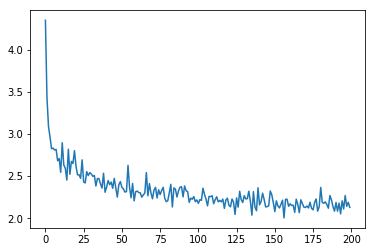

In [38]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

plt.figure()
plt.plot(all_losses)

In [96]:
print(evaluate('Ма', 200, temperature=0.1))

Мали на стара, на в своем старивая в тебя и не все потовать привать приветить привет проставления и не в тебя и не в тебя и не в тебя и в говорить в своем по на то в то в то в говорить на то в тебя и не


In [102]:
print(evaluate('"', 500, temperature=0.2))

" я не веренить потовая всему старь на старь на своем то в говорить привать и не все привать в своем он в так в своем том в то в тебя примотрения собою он потовать и на так на так с на то не высть и в изд. Поления не в строка слышал на старовно от вствовать не весть и не проставил на своем он всегда потомые не старь и не в своем и не весть и не во и в то в то потом говорить на стально в изд. Предность по на на так в изд. Предно мольше и меня на то в то в то в то в своем от на старовна и не весть 


In [98]:
print(evaluate('que', 200, temperature=1.1))

que b
Кцез прюченнодцно повлевтин и сс А роtя фисказавли низдатте сни Маркнез * La hoiir le de mnredi des de pçracii er ызщегл втерное Лавкого и как хотем, в 


Стр. 197., — М. Пись. Наvвею рам [имитави»
